# Breast Cancer Wisconsin (Diagnostic) Data Set
## About Dataset
## https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
import pandas as pd
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df.drop(columns=['Unnamed: 32'],inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
for column in df.columns:
    print("-"*30)
    print(column)
    print(df[column].nunique())

------------------------------
id
569
------------------------------
diagnosis
2
------------------------------
radius_mean
456
------------------------------
texture_mean
479
------------------------------
perimeter_mean
522
------------------------------
area_mean
539
------------------------------
smoothness_mean
474
------------------------------
compactness_mean
537
------------------------------
concavity_mean
537
------------------------------
concave points_mean
542
------------------------------
symmetry_mean
432
------------------------------
fractal_dimension_mean
499
------------------------------
radius_se
540
------------------------------
texture_se
519
------------------------------
perimeter_se
533
------------------------------
area_se
528
------------------------------
smoothness_se
547
------------------------------
compactness_se
541
------------------------------
concavity_se
533
------------------------------
concave points_se
507
------------------------------
s

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
result = {"M": 1,
         "B":0}

df['diagnosis'] = df['diagnosis'].map(result)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [12]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['diagnosis','id'])
y = df.diagnosis

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X,y)
y_resampled.value_counts()

diagnosis
0    212
1    212
Name: count, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.3,
                                                    stratify=y_resampled,
                                                    shuffle=True, 
                                                    random_state=42)

# Definindo modelos
scalers = [StandardScaler(), MinMaxScaler()]
modelos = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]

# Definindo as métricas a serem avaliadas (f1_score e acurácia)
f1_scorer = make_scorer(f1_score)
accuracy_scorer = make_scorer(accuracy_score)

# Criando listas para armazenar os resultados
resultados = []
scaler_nomes = []
modelo_nomes = []
f1_scores_lista = []
accuracy_scores_lista = []

# Criando o pipeline
for modelo in modelos:
          for scaler in scalers:
            pipeline = Pipeline([
                ('scaler', scaler),  # Pré-processamento com StandardScaler
                ('classifier', modelo)  # O modelo específico
            ])

            # Definindo a validação cruzada com StratifiedKFold
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            # Avaliando o modelo usando as métricas e validação cruzada
            f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f1_scorer)
            accuracy_scores = cross_val_score(pipeline, X_train, y_train, cv=cv,scoring=accuracy_scorer)

            # Armazenando os resultados
            scaler_nomes.append(scaler.__class__.__name__)
            modelo_nomes.append(modelo.__class__.__name__)
            f1_scores_lista.append(f1_scores.mean())
            accuracy_scores_lista.append(accuracy_scores.mean())

# Criando o DataFrame com os resultados
df_resultados = pd.DataFrame({
    'Modelo': modelo_nomes,
    'Scaler': scaler_nomes,
    'Média F1 Score': f1_scores_lista,
    'Média Acurácia': accuracy_scores_lista
})

# Exibindo o DataFrame
df_resultados = df_resultados.sort_values(by=[
    'Média F1 Score','Média Acurácia'], ascending=[False,False]).reset_index(drop=True)
df_resultados

,Modelo,Scaler,Média F1 Score,Média Acurácia
0,LogisticRegression,StandardScaler,0.972872,0.972938
1,LogisticRegression,MinMaxScaler,0.968859,0.969605
2,RandomForestClassifier,StandardScaler,0.962870,0.959435
3,RandomForestClassifier,MinMaxScaler,0.955969,0.952655
4,DecisionTreeClassifier,StandardScaler,0.929446,0.911977
5,DecisionTreeClassifier,MinMaxScaler,0.914857,0.901808


In [15]:
# Criando um dicionario para treinar o modelo a partir do dataframe
melhor_conjunto = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

# Obtendo os valores do DataFrame
modelo_selecionado = df_resultados.loc[0, 'Modelo']
scaler_selecionado = df_resultados.loc[0, 'Scaler']

# Obtendo os objetos do dicionário
melhor_modelo = melhor_conjunto.get(modelo_selecionado)
melhor_scaler = melhor_conjunto.get(scaler_selecionado)

# Exibindo os objetos
print(f'Melhor Modelo: {melhor_modelo}')
print(f'Melhor Scaler: {melhor_scaler}')

Melhor Modelo: LogisticRegression()
Melhor Scaler: StandardScaler()



Melhor Modelo: LogisticRegression()
Melhor Scaler: StandardScaler()
Acurácia de : 97.66%
F1_score de : 97.6%



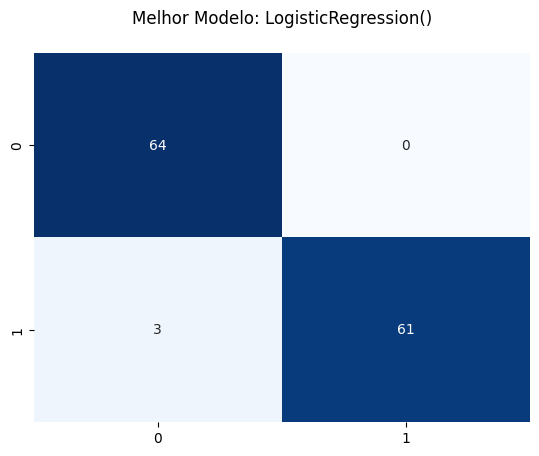

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Separando de X e Y

X = df.drop(columns=['diagnosis','id'])
y = df.diagnosis

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X,y)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, 
                                                    shuffle=True, random_state=42)
# Preprocessando os dados de treino e teste
X_train_escalado = melhor_scaler.fit_transform(X_train)
X_test_escalado = melhor_scaler.fit_transform(X_test)

# treinando o modelo
modelo = melhor_modelo.fit(X_train_escalado, y_train)

# testando os dados
y_pred = modelo.predict(X_test_escalado)

print(f'\nMelhor Modelo: {modelo}')
print(f'Melhor Scaler: {melhor_scaler}')
print(f"Acurácia de : {round(accuracy_score(y_test, y_pred)*100,2)}%")
print(f"F1_score de : {round(f1_score(y_test, y_pred)*100,2)}%\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title(f'Melhor Modelo: {modelo}\n');

In [17]:
import pickle
with open('modelo.pkl', 'wb') as file:
    pickle.dump(modelo, file)